### 1. Introduction

1.1 Background

The City of Cape Town is the legislative capital of South Africa. It is oftenly, called the Mother city and is located in the Western Cape province of South Africa. The is known for its natural setting as well as its landmarks such as Table Mountain and Cape Point. Cape Town is said to be the home to 64% of the Western Cape's population making it one of the most multicultural cities in the world. Cape town is a popular destination for immigrants, expatriates as well as tourists alike. The city boosts a population of 3 740 026 people, according to the <a href="https://en.wikipedia.org/wiki/South_African_National_Census_of_2011">South African National Census of 2011</a>. Although, the City of Cape Town enjoys the support of many immigrants, expatriates and tourists it has to compete with two other cities one of which is Johannesburg. 

Johannesburg often called Jozi or Joburg is the largest city in South Africa and one of the 50 largest urban areas in the world. It is the provincial capital of the wealthiest province in South Africa called Gauteng. The city is located in the mineral-rich Witwatersrand range of hills and is the centre of large-scale gold and diamond trade [3]. Johannesburg has a population of 4 434 827 people of which 73% are blacks, 18% are whites, 6% coloureds and 4% of the population are asians. This city is not traditional known as a tourist destination, but has seen many tourists due to its role as a transit point for connecting flights to other parts of South Africa. 



1.2 Problem

These two cities has similarities as well as dissimilarities that set them apart from each other. This sometimes leads to tourists being unsure of which of the cities to chose as the their tourist destination. This project thus aims to alleviate the stress and make the choice of immigrants, expatriates and tourists considering South African cities as their destination effortless. In addition, this project will assist the South African government as well as the South African business sector to able to tailor and improve their services in order to deliver the best experience for immigrants, expatriates and tourists.  

1.3 Interested stakeholders

The people of interest in this project are immigrants, expatriates, tourists, the South African government as well as the South African business sector. 

### 2. Data acquisition and preparation

2.1 Data sources 

The data about the three cities will be scraped from multiple websites for the cities rental expenses, property prices, basic utilities, expected expenses for food items, expected costs for entertainment, transportation costs, quality of life scores as well as crime statistics. In addition, the Foursquare API will also be used to get specific type of venues and landmarks, explore a given venues or landmarks, and search for trending venues or landmarks for the two cities.

2.2 Data cleaning

The data acquired through webscrapping required some cleaning before it could be utilised. The cities rental expenses, property prices, basic utilities, expected expenses for food items, expected costs for entertainment, transportation costs, quality of life scores as well as crime statistics data for each city was represented in a pandas dataframe. In each dataframe the costs of each item had the currency sign located after the amount, thus that was corrected and all the amount reflected accurately. The, second thing we had to do was to combine the dataframes into a single dataframe where the costs for each city were given as columns and the items considered were given as the rows of the dataframe. When the new dataframe consisting of the costs of items in all cites was created it had rows that were duplicated, thus these needed to be removed in order to avoid redundent information. 

2.2 Feature selection

The data was collected from several sources, there were data that we did not consider, i.e. the range of prices for items sold in Cape town and Johannesburg. In addition in the data received from the Four square application, only the most popular venues around the specific hotels in the Protea hotels company were considered in this project and these were mapped.

### 3. Methodology

In [1]:
import numpy as np # library to handle data in a vectorized manner
import random
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import csv

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import urllib.request
from bs4 import BeautifulSoup

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

Scrapped the Cape town cost of items data from a website and created a dataframe where it was contained 

In [2]:
wiki= "https://www.numbeo.com/cost-of-living/in/Cape-Town"
page= urllib.request.urlopen(wiki)
soup = BeautifulSoup(page,'lxml')
right_table=soup.find('table', {'class':'data_wide_table'})
right_table
r_table= [tr.find_all("td") for tr in right_table.find_all("tr")]
r_table = r_table[1:]
r_table = [[el.get_text(strip=True) for el in td] for td in r_table]
Addres_data= pd.DataFrame.from_records(r_table, columns=["Item","Cape Town_Cost", "Range"])
Addres_data.dropna(inplace = True)  
Addres_data["Cape Town_Cost"].astype('str').dtype
Addres_data["Cape Town_Cost"]= Addres_data["Cape Town_Cost"].str.replace('R', ' ')
Addres_data["Cape Town_Cost"]= "R" + Addres_data["Cape Town_Cost"]
Addres_data.head(20)

,Item,Cape Town_Cost,Range
0,"Meal, Inexpensive Restaurant",R140.00,100.00-200.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",R500.00,400.00-700.00
2,McMeal at McDonalds (or Equivalent Combo Meal),R60.00,50.00-80.00
3,Domestic Beer (1 pint draught),R30.00,30.00-40.00
4,Imported Beer (12 oz small bottle),R40.00,30.00-50.00
5,Cappuccino (regular),R26.89,23.00-30.00
6,Coke/Pepsi (12 oz small bottle),R13.74,10.00-20.00
7,Water (12 oz small bottle),R10.81,8.00-18.00
9,"Milk (regular), (1 gallon)",R50.91,37.85-68.14
10,Loaf of Fresh White Bread (1 lb),R12.33,9.07-16.33


Scrapped the Johannesburg cost of items data from a website and created a dataframe where it was contained

In [3]:
wiki1= "https://www.numbeo.com/cost-of-living/in/Johannesburg"
page1= urllib.request.urlopen(wiki1)
soup1 = BeautifulSoup(page1,'lxml')
right_table1=soup1.find('table', {'class':'data_wide_table'})
right_table1
r_table1= [tr.find_all("td") for tr in right_table1.find_all("tr")]
r_table1 = r_table1[1:]
r_table1 = [[el.get_text(strip=True) for el in td] for td in r_table1]
Addres_data1= pd.DataFrame.from_records(r_table1, columns=["Item","Johannesburg_Cost", "Range"])
Addres_data1.dropna(inplace = True)  
Addres_data1["Johannesburg_Cost"].astype('str').dtype
Addres_data1["Johannesburg_Cost"]= Addres_data1["Johannesburg_Cost"].str.replace('R', ' ')
Addres_data1["Johannesburg_Cost"]= "R" + Addres_data1["Johannesburg_Cost"]
Addres_data1.head(20)

,Item,Johannesburg_Cost,Range
0,"Meal, Inexpensive Restaurant",R140.00,90.00-200.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",R500.00,400.00-700.00
2,McMeal at McDonalds (or Equivalent Combo Meal),R55.00,45.00-65.00
3,Domestic Beer (1 pint draught),R25.00,20.00-35.00
4,Imported Beer (12 oz small bottle),R35.00,25.00-40.00
5,Cappuccino (regular),R25.75,20.00-30.00
6,Coke/Pepsi (12 oz small bottle),R14.26,11.00-19.00
7,Water (12 oz small bottle),R10.80,8.00-15.00
9,"Milk (regular), (1 gallon)",R62.60,45.42-90.85
10,Loaf of Fresh White Bread (1 lb),R12.36,8.50-15.42


Merged the two dataframes with the cost of items from the two cities, Cape town and Johannesburg

In [4]:
cost_all= pd.merge(Addres_data, Addres_data1, how="inner", on="Item")
cost_all.head(20)

,Item,Cape Town_Cost,Range_x,Johannesburg_Cost,Range_y
0,"Meal, Inexpensive Restaurant",R140.00,100.00-200.00,R140.00,90.00-200.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",R500.00,400.00-700.00,R500.00,400.00-700.00
2,McMeal at McDonalds (or Equivalent Combo Meal),R60.00,50.00-80.00,R55.00,45.00-65.00
3,Domestic Beer (1 pint draught),R30.00,30.00-40.00,R25.00,20.00-35.00
4,Imported Beer (12 oz small bottle),R40.00,30.00-50.00,R35.00,25.00-40.00
5,Imported Beer (12 oz small bottle),R40.00,30.00-50.00,R28.29,16.00-45.00
6,Imported Beer (12 oz small bottle),R30.52,20.00-40.00,R35.00,25.00-40.00
7,Imported Beer (12 oz small bottle),R30.52,20.00-40.00,R28.29,16.00-45.00
8,Cappuccino (regular),R26.89,23.00-30.00,R25.75,20.00-30.00
9,Coke/Pepsi (12 oz small bottle),R13.74,10.00-20.00,R14.26,11.00-19.00


Duplicated data in the dataframe was removed

In [5]:
cost_all= cost_all.drop_duplicates(["Item"])
cost_all                                

,Item,Cape Town_Cost,Range_x,Johannesburg_Cost,Range_y
0,"Meal, Inexpensive Restaurant",R140.00,100.00-200.00,R140.00,90.00-200.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",R500.00,400.00-700.00,R500.00,400.00-700.00
2,McMeal at McDonalds (or Equivalent Combo Meal),R60.00,50.00-80.00,R55.00,45.00-65.00
3,Domestic Beer (1 pint draught),R30.00,30.00-40.00,R25.00,20.00-35.00
4,Imported Beer (12 oz small bottle),R40.00,30.00-50.00,R35.00,25.00-40.00
8,Cappuccino (regular),R26.89,23.00-30.00,R25.75,20.00-30.00
9,Coke/Pepsi (12 oz small bottle),R13.74,10.00-20.00,R14.26,11.00-19.00
10,Water (12 oz small bottle),R10.81,8.00-18.00,R10.80,8.00-15.00
11,"Milk (regular), (1 gallon)",R50.91,37.85-68.14,R62.60,45.42-90.85
12,Loaf of Fresh White Bread (1 lb),R12.33,9.07-16.33,R12.36,8.50-15.42


In [200]:
cost_all.shape
cost_all["Cape Town_Cost"]= cost_all["Cape Town_Cost"].str.replace('R', ' ')
cost_all["Johannesburg_Cost"]= cost_all["Johannesburg_Cost"].str.replace('R', ' ')
cost_rest= cost_all.head(8)
cost_rest

,Item,Cape Town_Cost,Range_x,Johannesburg_Cost,Range_y
0,"Meal, Inexpensive Restaurant",140.00,100.00-200.00,140.00,90.00-200.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",500.00,400.00-700.00,500.00,400.00-700.00
2,McMeal at McDonalds (or Equivalent Combo Meal),60.00,50.00-80.00,55.00,45.00-65.00
3,Domestic Beer (1 pint draught),30.00,30.00-40.00,25.00,20.00-35.00
4,Imported Beer (12 oz small bottle),40.00,30.00-50.00,35.00,25.00-40.00
8,Cappuccino (regular),26.89,23.00-30.00,25.75,20.00-30.00
9,Coke/Pepsi (12 oz small bottle),13.74,10.00-20.00,14.26,11.00-19.00
10,Water (12 oz small bottle),10.81,8.00-18.00,10.80,8.00-15.00


In [201]:
cost_rest.drop(['Range_x','Range_y'], axis=1, inplace=True)
cost_rest


,Item,Cape Town_Cost,Johannesburg_Cost
0,"Meal, Inexpensive Restaurant",140.00,140.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",500.00,500.00
2,McMeal at McDonalds (or Equivalent Combo Meal),60.00,55.00
3,Domestic Beer (1 pint draught),30.00,25.00
4,Imported Beer (12 oz small bottle),40.00,35.00
8,Cappuccino (regular),26.89,25.75
9,Coke/Pepsi (12 oz small bottle),13.74,14.26
10,Water (12 oz small bottle),10.81,10.80


In [202]:
cost_rest=cost_rest.astype({'Cape Town_Cost': 'float','Johannesburg_Cost': 'float'})
cost_rest.dtypes
cost_rest.sort_values(["Cape Town_Cost"], ascending= True, axis= 0, inplace=True)
cost_rest

,Item,Cape Town_Cost,Johannesburg_Cost
10,Water (12 oz small bottle),10.81,10.80
9,Coke/Pepsi (12 oz small bottle),13.74,14.26
8,Cappuccino (regular),26.89,25.75
3,Domestic Beer (1 pint draught),30.00,25.00
4,Imported Beer (12 oz small bottle),40.00,35.00
2,McMeal at McDonalds (or Equivalent Combo Meal),60.00,55.00
0,"Meal, Inexpensive Restaurant",140.00,140.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",500.00,500.00


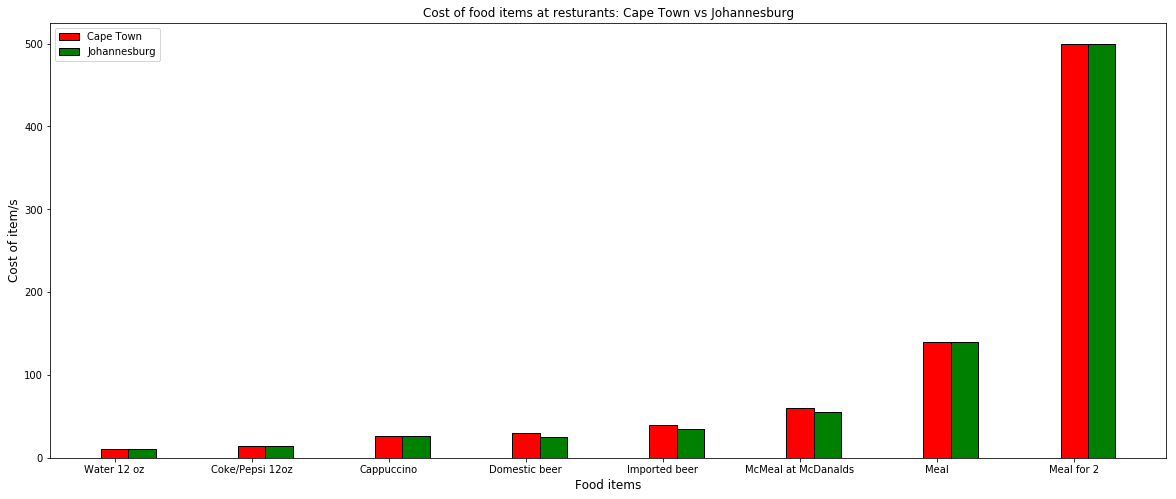

In [206]:
import matplotlib
import matplotlib.pyplot as plt
figu= plt.figure(figsize= (20,8))
barwidth_= 0.2
Categ=['Water 12 oz', 'Coke/Pepsi 12oz', 'Cappuccino','Domestic beer','Imported beer', 'McMeal at McDanalds','Meal','Meal for 2']
cities_d= ['Cape Town','Johannesburg']
pos= np.arange(len(Categ))
Cape_d= cost_rest['Cape Town_Cost'].tolist()
Jozi_d= cost_rest['Johannesburg_Cost'].tolist()
plt.xticks(pos, Categ)
plt.bar(pos, Cape_d, barwidth_, color='red', edgecolor='Black')
plt.bar(pos+barwidth_, Jozi_d, barwidth_, color='green', edgecolor='Black')
plt.xlabel('Food items', fontsize= 12)
plt.ylabel('Cost of item/s', fontsize= 12)
plt.title('Cost of food items at resturants: Cape Town vs Johannesburg')
plt.legend(cities_d,loc=0)
plt.show()

In [29]:
cost_groc= cost_all.head(26)
cost_groc= cost_groc.drop(cost_groc.index[0:8])
cost_groc

,Item,Cape Town_Cost,Range_x,Johannesburg_Cost,Range_y
11,"Milk (regular), (1 gallon)",50.91,37.85-68.14,62.60,45.42-90.85
12,Loaf of Fresh White Bread (1 lb),12.33,9.07-16.33,12.36,8.50-15.42
13,"Rice (white), (1 lb)",10.37,6.80-13.61,9.31,6.80-11.77
14,Eggs (regular) (12),32.64,24.00-46.00,31.00,24.00-42.00
15,Local Cheese (1 lb),49.11,40.37-58.06,47.87,36.29-68.04
16,"Chicken Breasts (Boneless, Skinless), (1 lb)",37.12,27.22-54.43,34.84,27.22-45.36
17,Beef Round (1 lb) (or Equivalent Back Leg Red ...,46.93,31.75-63.50,45.52,31.75-72.57
18,Apples (1 lb),10.52,7.26-13.61,10.20,7.26-13.61
19,Banana (1 lb),8.73,6.35-11.34,8.49,6.80-12.70
20,Oranges (1 lb),9.27,6.80-13.61,10.77,5.67-18.14


In [207]:
cost_groc.drop(['Range_x','Range_y'], axis=1, inplace=True)
cost_groc

,Item,Cape Town_Cost,Johannesburg_Cost
11,"Milk (regular), (1 gallon)",50.91,62.60
12,Loaf of Fresh White Bread (1 lb),12.33,12.36
13,"Rice (white), (1 lb)",10.37,9.31
14,Eggs (regular) (12),32.64,31.00
15,Local Cheese (1 lb),49.11,47.87
16,"Chicken Breasts (Boneless, Skinless), (1 lb)",37.12,34.84
17,Beef Round (1 lb) (or Equivalent Back Leg Red ...,46.93,45.52
18,Apples (1 lb),10.52,10.20
19,Banana (1 lb),8.73,8.49
20,Oranges (1 lb),9.27,10.77


In [208]:
cost_groc=cost_groc.astype({'Cape Town_Cost': 'float','Johannesburg_Cost': 'float'})
cost_groc.dtypes
cost_groc.sort_values(["Cape Town_Cost"], ascending= True, axis= 0, inplace=True)
cost_groc

,Item,Cape Town_Cost,Johannesburg_Cost
23,Onion (1 lb),6.37,7.91
22,Potato (1 lb),6.62,8.56
21,Tomato (1 lb),8.27,9.68
19,Banana (1 lb),8.73,8.49
20,Oranges (1 lb),9.27,10.77
13,"Rice (white), (1 lb)",10.37,9.31
18,Apples (1 lb),10.52,10.20
12,Loaf of Fresh White Bread (1 lb),12.33,12.36
24,Lettuce (1 head),14.14,15.61
25,Water (1.5 liter bottle),15.35,16.04


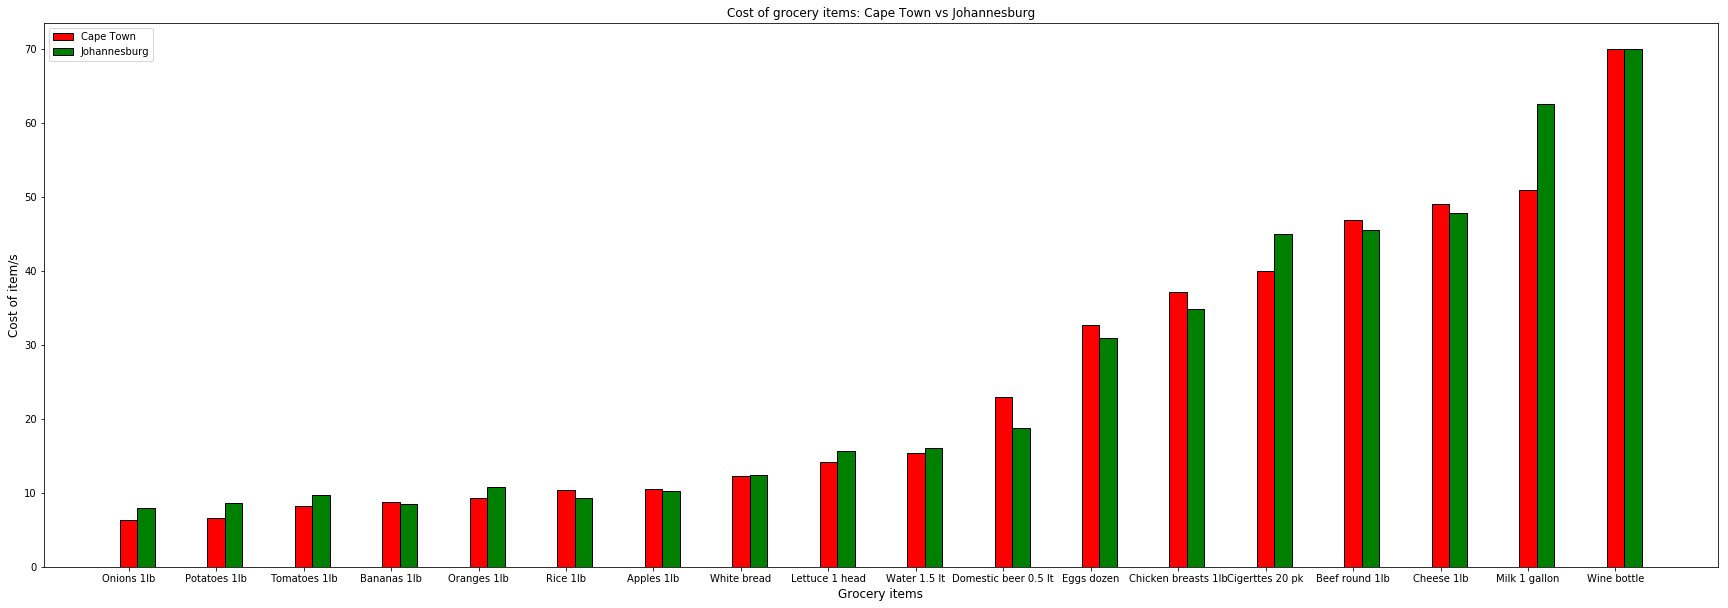

In [217]:
import matplotlib
import matplotlib.pyplot as plt
figu= plt.figure(figsize= (30,10))
barwidth_= 0.2
Categ=['Onions 1lb', 'Potatoes 1lb', 'Tomatoes 1lb', 'Bananas 1lb','Oranges 1lb', 'Rice 1lb',  'Apples 1lb', 'White bread', 'Lettuce 1 head', 'Water 1.5 lt','Domestic beer 0.5 lt','Eggs dozen','Chicken breasts 1lb', 'Cigerttes 20 pk', 'Beef round 1lb',  'Cheese 1lb','Milk 1 gallon','Wine bottle']
cities_d= ['Cape Town','Johannesburg']
pos= np.arange(len(Categ))
Cape_d= cost_groc['Cape Town_Cost'].tolist()
Jozi_d= cost_groc['Johannesburg_Cost'].tolist()
plt.xticks(pos, Categ)
plt.bar(pos, Cape_d, barwidth_, color='red', edgecolor='Black')
plt.bar(pos+barwidth_, Jozi_d, barwidth_, color='green', edgecolor='Black')
plt.xlabel('Grocery items', fontsize= 12)
plt.ylabel('Cost of item/s', fontsize= 12)
plt.title('Cost of grocery items: Cape Town vs Johannesburg')
plt.legend(cities_d,loc=0)
plt.show()

In [153]:
cost_trans= cost_all.head(34)
cost_trans= cost_trans.drop(cost_trans.index[0:26])
cost_trans= cost_trans.drop(cost_trans.index[4:])
cost_trans
cost_trans.drop(['Range_x','Range_y'], axis=1, inplace=True)
cost_trans

,Item,Cape Town_Cost,Johannesburg_Cost
29,One-way Ticket (Local Transport),15.00,30.00
30,Monthly Pass (Regular Price),425.00,733.50
31,Taxi Start (Normal Tariff),15.00,20.00
32,Taxi 1 mile (Normal Tariff),16.09,16.50


In [157]:
cost_trans=cost_trans.astype({'Cape Town_Cost': 'float','Johannesburg_Cost': 'float'})
cost_trans.dtypes
cost_trans.sort_values(["Cape Town_Cost"], ascending= True, axis= 0, inplace=True)
cost_trans

,Item,Cape Town_Cost,Johannesburg_Cost
29,One-way Ticket (Local Transport),15.00,30.0
31,Taxi Start (Normal Tariff),15.00,20.0
32,Taxi 1 mile (Normal Tariff),16.09,16.5
30,Monthly Pass (Regular Price),425.00,733.5


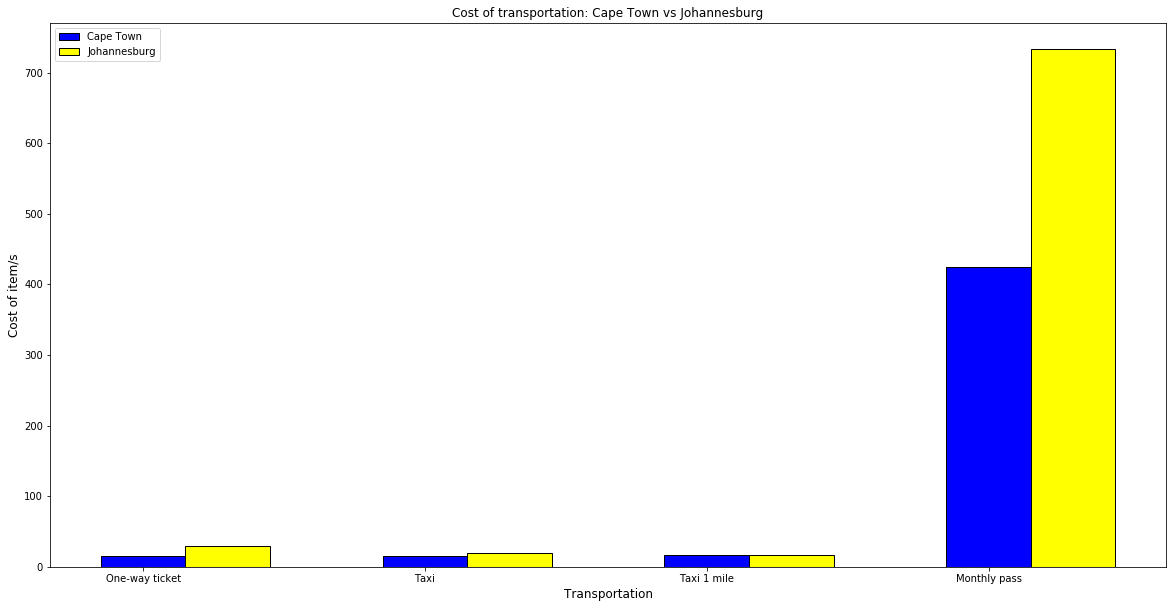

In [163]:
import matplotlib
import matplotlib.pyplot as plt
figu= plt.figure(figsize= (20,10))
barwidth_= 0.3
Categ=['One-way ticket','Taxi','Taxi 1 mile','Monthly pass']
cities_d= ['Cape Town','Johannesburg']
pos= np.arange(len(Categ))
Cape_d= cost_trans['Cape Town_Cost'].tolist()
Jozi_d= cost_trans['Johannesburg_Cost'].tolist()
plt.xticks(pos, Categ)
plt.bar(pos, Cape_d, barwidth_, color='blue', edgecolor='Black')
plt.bar(pos+barwidth_, Jozi_d, barwidth_, color='yellow', edgecolor='Black')
plt.xlabel('Transportation', fontsize= 12)
plt.ylabel('Cost of item/s', fontsize= 12)
plt.title('Cost of transportation: Cape Town vs Johannesburg')
plt.legend(cities_d,loc=0)
plt.show()

In [32]:
cost_u= cost_all.head(37)
cost_u= cost_u.drop(cost_u.index[0:34])
cost_u

,Item,Cape Town_Cost,Range_x,Johannesburg_Cost,Range_y
37,"Basic (Electricity, Heating, Cooling, Water, G...","1,004.03","566.67-2,000.00","1,206.61","680.00-2,203.70"
38,1 min. of Prepaid Mobile Tariff Local (No Disc...,1.54,0.85-2.00,1.53,0.80-3.00
39,"Internet (60 Mbps or More, Unlimited Data, Cab...",999.41,"680.00-1,400.00",981.91,"700.00-1,500.00"


In [34]:
cost_sp= cost_all.head(40)
cost_sp= cost_sp.drop(cost_sp.index[0:37])
cost_sp

,Item,Cape Town_Cost,Range_x,Johannesburg_Cost,Range_y
40,"Fitness Club, Monthly Fee for 1 Adult",536.59,300.00-800.00,515.05,259.00-800.00
41,Tennis Court Rent (1 Hour on Weekend),135.42,50.00-300.00,160.12,50.00-300.00
42,"Cinema, International Release, 1 Seat",80.00,72.00-100.00,85.50,75.00-120.00


In [192]:
cost_cs= cost_all.head(52)
cost_cs= cost_cs.drop(cost_cs.index[0:46])
cost_cs
cost_cs.drop(['Range_x','Range_y'], axis=1, inplace=True)
cost_cs


,Item,Cape Town_Cost,Johannesburg_Cost
49,Apartment (1 bedroom) in City Centre,"11,007.94","6,718.97"
50,Apartment (1 bedroom) Outside of Centre,"7,328.12","5,924.62"
51,Apartment (3 bedrooms) in City Centre,"22,707.14","13,508.00"
52,Apartment (3 bedrooms) Outside of Centre,"14,949.21","11,652.88"
53,Price per Square Feet to Buy Apartment in City...,"3,578.27","1,356.02"
54,Price per Square Feet to Buy Apartment Outside...,"1,736.99",984.11


In [193]:
cost_cs["Cape Town_Cost"]= cost_cs["Cape Town_Cost"].str.replace(',', '')
cost_cs["Johannesburg_Cost"]= cost_cs["Johannesburg_Cost"].str.replace(',', '')
cost_cs["Cape Town_Cost"]= cost_cs["Cape Town_Cost"].str.replace(' ', '')
cost_cs["Johannesburg_Cost"]= cost_cs["Johannesburg_Cost"].str.replace(' ', '')
cost_cs

,Item,Cape Town_Cost,Johannesburg_Cost
49,Apartment (1 bedroom) in City Centre,11007.94,6718.97
50,Apartment (1 bedroom) Outside of Centre,7328.12,5924.62
51,Apartment (3 bedrooms) in City Centre,22707.14,13508.00
52,Apartment (3 bedrooms) Outside of Centre,14949.21,11652.88
53,Price per Square Feet to Buy Apartment in City...,3578.27,1356.02
54,Price per Square Feet to Buy Apartment Outside...,1736.99,984.11


In [196]:
cost_cs.dtypes
cost_cs=cost_cs.astype({'Cape Town_Cost': 'float','Johannesburg_Cost': 'float'})
cost_cs.sort_values(["Cape Town_Cost"], ascending= True, axis= 0, inplace=True)
cost_cs

,Item,Cape Town_Cost,Johannesburg_Cost
54,Price per Square Feet to Buy Apartment Outside...,1736.99,984.11
53,Price per Square Feet to Buy Apartment in City...,3578.27,1356.02
50,Apartment (1 bedroom) Outside of Centre,7328.12,5924.62
49,Apartment (1 bedroom) in City Centre,11007.94,6718.97
52,Apartment (3 bedrooms) Outside of Centre,14949.21,11652.88
51,Apartment (3 bedrooms) in City Centre,22707.14,13508.00


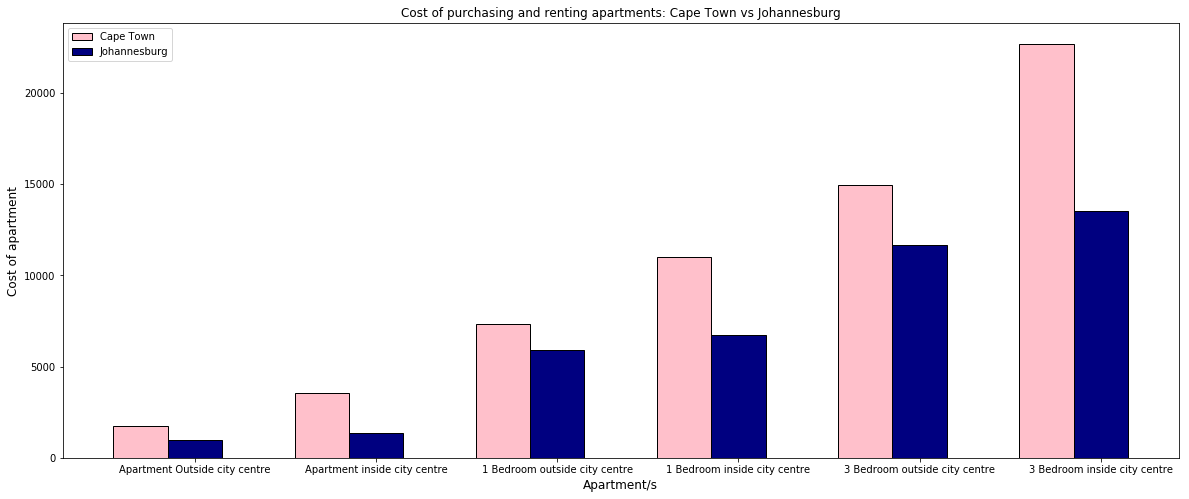

In [199]:
import matplotlib.pyplot as plt
figu= plt.figure(figsize= (20,8))
barwidth_= 0.3
Categ=['Apartment Outside city centre', 'Apartment inside city centre', '1 Bedroom outside city centre','1 Bedroom inside city centre','3 Bedroom outside city centre','3 Bedroom inside city centre']
cities_d= ['Cape Town','Johannesburg']
pos= np.arange(len(Categ))
Cape_d= cost_cs['Cape Town_Cost'].tolist()
Jozi_d= cost_cs['Johannesburg_Cost'].tolist()
plt.xticks(pos+ barwidth_, Categ)
plt.bar(pos, Cape_d, barwidth_, color='pink', edgecolor='Black')
plt.bar(pos+barwidth_, Jozi_d, barwidth_, color='navy', edgecolor='Black')
plt.xlabel('Apartment/s', fontsize= 12)
plt.ylabel('Cost of apartment', fontsize= 12)
plt.title('Cost of purchasing and renting apartments: Cape Town vs Johannesburg')
plt.legend(cities_d,loc=0)
plt.show()

## Loading my Foursquare credentials 

In [218]:
CLIENT_ID = 'R4IR25WUO0PNTTBOVUDUBHOMQGELAMGAYWTBCHILYS41AIKM' # your Foursquare ID
CLIENT_SECRET = 'X1YLKCCWZYAH55DO124JUTHCZMDBXAF5XM1GUPON5QZW03XD' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R4IR25WUO0PNTTBOVUDUBHOMQGELAMGAYWTBCHILYS41AIKM
CLIENT_SECRET:X1YLKCCWZYAH55DO124JUTHCZMDBXAF5XM1GUPON5QZW03XD


Getting the latitude and longitude coordinates of the Cape Town Marriott Hotel Crystal Towers

In [219]:
address1 = '1 Corner Of Century Boulevard, Century city, Cape Town'

geolocator = Nominatim(user_agent="foursquare_agent1")
location = geolocator.geocode(address1)
latitude1 = location.latitude
longitude1 = location.longitude
print(latitude1, longitude1)

-33.8936656 18.5139589


Getting all the popular venues 600 meters around the Cape Town Marriott Hotel Crystal Towers using Foursquare

In [220]:
radius= 600
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=R4IR25WUO0PNTTBOVUDUBHOMQGELAMGAYWTBCHILYS41AIKM&client_secret=X1YLKCCWZYAH55DO124JUTHCZMDBXAF5XM1GUPON5QZW03XD&ll=-33.8936656,18.5139589&v=20180604&radius=600&limit=100'

Inserting all the data of the popular venues around the Cape Town Marriott Hotel Crystal Towers into a json file

In [221]:
results = requests.get(url).json()
'There are {} around the hotel.'.format(len(results['response']['groups'][0]['items']))
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4ca599d2931bb60ceb628be2',
  'name': 'Canal Walk Shopping Centre',
  'location': {'address': 'Century City Blvd',
   'lat': -33.8919778,
   'lng': 18.5125769,
   'labeledLatLngs': [{'label': 'display',
     'lat': -33.8919778,
     'lng': 18.5125769}],
   'distance': 227,
   'postalCode': '7441',
   'cc': 'ZA',
   'neighborhood': 'Century City',
   'city': 'Cape Town',
   'state': 'Gauteng',
   'country': 'iNingizimu Afrika',
   'formattedAddress': ['Century City Blvd',
    'Cape Town',
    '7441',
    'iNingizimu Afrika']},
  'categories': [{'id': '4bf58dd8d48988d1fd941735',
    'name': 'Shopping Mall',
    'pluralName': 'Shopping Malls',
    'shortName': 'Mall',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []},
 

Creating a dataframe from a json file of all the popular venues around the Cape Town Marriott Hotel Crystal Towers

In [222]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Canal Walk Shopping Centre,Shopping Mall,Century City Blvd,ZA,Cape Town,iNingizimu Afrika,NaN,227,"[Century City Blvd, Cape Town, 7441, iNingizim...","[{'label': 'display', 'lat': -33.8919778, 'lng...",-33.891978,18.512577,Century City,7441,Gauteng,4ca599d2931bb60ceb628be2
1,Fives Futbol Canal Walk,Soccer Field,NaN,ZA,NaN,iNingizimu Afrika,NaN,169,[iNingizimu Afrika],"[{'label': 'display', 'lat': -33.8951051901852...",-33.895105,18.513355,NaN,NaN,NaN,5274b47911d2619a97936664
2,Col'Cacchio,Pizza Place,NaN,ZA,iKapa,iNingizimu Afrika,NaN,227,"[iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.8927202939967...",-33.892720,18.511776,NaN,NaN,Western Cape,527f6b4211d21e9068c9a000
3,Kauai,Juice Bar,"Canal Walk, Century Blvd, Century City",ZA,Milnerton,iNingizimu Afrika,at Table Bay Blvd,289,"[Canal Walk, Century Blvd, Century City (at Ta...","[{'label': 'display', 'lat': -33.8925258540525...",-33.892526,18.511142,NaN,7441,Western Cape,4b640f83f964a520559d2ae3
4,Ocean Basket,Seafood Restaurant,Century boulevard,ZA,iKapa,iNingizimu Afrika,NaN,248,"[Century boulevard, iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.8919755033905...",-33.891976,18.512197,NaN,NaN,Western Cape,4c1e0c84b306c928066e66b7
5,Caffè Magnifico,Café,Canal Walk,ZA,iKapa,iNingizimu Afrika,NaN,295,"[Canal Walk, iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.8929059789542...",-33.892906,18.510892,NaN,NaN,Western Cape,4b90f613f964a5204d9c33e3
6,Woolworths,Clothing Store,"Canal Walk, Century City",ZA,iKapa,iNingizimu Afrika,NaN,340,"[Canal Walk, Century City, iKapa, 7441, iNingi...","[{'label': 'display', 'lat': -33.8944544556307...",-33.894454,18.510398,NaN,7441,Western Cape,4b7c1c94f964a520977d2fe3
7,Osumo,Snack Place,Rialto,ZA,Canal Walk,iNingizimu Afrika,NaN,372,"[Rialto, Canal Walk, 7441, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.8940291622574...",-33.894029,18.509947,NaN,7441,Western Cape,4b5aa96df964a520e1cf28e3
8,Limnos Bakery,Bakery,Canal Walk,ZA,iKapa,iNingizimu Afrika,NaN,289,"[Canal Walk, iKapa, 7441, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.892562, 'lng'...",-33.892562,18.511127,NaN,7441,Western Cape,4c62e14086b6be9aaf258d34
9,Jakura sushi,Sushi Restaurant,Canal Walk,ZA,iKapa,iNingizimu Afrika,NaN,337,"[Canal Walk, iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.8926202231578...",-33.892620,18.510530,NaN,NaN,Western Cape,4e99d0adcc215f3adc8a53a8


In [223]:
print('{} venues were returned by Foursquare.'.format(dataframe_filtered.shape[0]))

55 venues were returned by Foursquare.


This is a map showing the Cape Town Marriott Hotel Crystal Towers and the surrounding popular spots.

In [224]:
venues_map1 = folium.Map(location=[latitude1, longitude1], zoom_start=16) # generate map centred around the Cape Town Marriott Hotel Crystal Towers

# add a red circle marker to represent the Hotel
folium.features.CircleMarker(
    [latitude1, longitude1],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map1)

# add the popular spots around the Cape Town Marriott Hotel Crystal Towers as blue circle markers
for lat1, lng1, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat1, lng1],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

# display map
venues_map1

Getting the latitude and longitude coordinates for the Protea Hotel Johannesburg Wanderers

In [225]:
address2 = '120 De Korte Street, Braamfontein, Johannesburg'

geolocator = Nominatim(user_agent="foursquare_agent2")
location = geolocator.geocode(address2)
latitude2 = location.latitude
longitude2 = location.longitude
print(latitude2, longitude2)

-26.1936079 28.0394433968092


Getting all the popular venues 600 meters around the Protea Hotel Johannesburg Wanderers using Foursquare

In [226]:
radius= 600
url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, radius, LIMIT)
url1

'https://api.foursquare.com/v2/venues/explore?client_id=R4IR25WUO0PNTTBOVUDUBHOMQGELAMGAYWTBCHILYS41AIKM&client_secret=X1YLKCCWZYAH55DO124JUTHCZMDBXAF5XM1GUPON5QZW03XD&ll=-26.1936079,28.0394433968092&v=20180604&radius=600&limit=100'

Inserting all the data of the popular venues around the Protea Hotel Johannesburg Wanderers into a json file

In [227]:
results1 = requests.get(url1).json()
'There are {} around the hotel.'.format(len(results1['response']['groups'][0]['items']))
items = results1['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4b05870df964a520557d22e3',
  'name': 'Hotel Parktonian',
  'location': {'address': '120 de Korte Street',
   'lat': -26.193721477400313,
   'lng': 28.039426199318118,
   'labeledLatLngs': [{'label': 'display',
     'lat': -26.193721477400313,
     'lng': 28.039426199318118}],
   'distance': 12,
   'postalCode': '2001',
   'cc': 'ZA',
   'city': 'EGoli',
   'state': 'IGauteng',
   'country': 'iNingizimu Afrika',
   'formattedAddress': ['120 de Korte Street',
    'EGoli',
    '2001',
    'iNingizimu Afrika']},
  'categories': [{'id': '4bf58dd8d48988d1fa931735',
    'name': 'Hotel',
    'pluralName': 'Hotels',
    'shortName': 'Hotel',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4b05870df9

Creating a dataframe from a json file of all the popular venues around the Protea Hotel Johannesburg Wanderers.

In [228]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
dataframe1 = json_normalize(items) # flatten JSON

# filter columns
filtered_columns1 = ['venue.name', 'venue.categories'] + [col for col in dataframe1.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered1 = dataframe1.loc[:, filtered_columns1]

# filter the category for each row
dataframe_filtered1['venue.categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered1.columns = [col.split('.')[-1] for col in dataframe_filtered1.columns]

dataframe_filtered1.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Hotel Parktonian,Hotel,120 de Korte Street,ZA,EGoli,iNingizimu Afrika,NaN,12,"[120 de Korte Street, EGoli, 2001, iNingizimu ...","[{'label': 'display', 'lat': -26.1937214774003...",-26.193721,28.039426,2001,IGauteng,4b05870df964a520557d22e3
1,The Orbit – Jazz Club & Bistro,Jazz Club,"81 De Korte Street, Braamfontein",ZA,Braamfontein,iNingizimu Afrika,btwn Melle & De Beer St.,385,"[81 De Korte Street, Braamfontein (btwn Melle ...","[{'label': 'display', 'lat': -26.1934237682055...",-26.193424,28.035587,2001,IGauteng,531f47b1498ec4d2616076c2
2,Double Shot Tea & Coffee,Coffee Shop,15 Melle St. Braamfontein,ZA,EGoli,iNingizimu Afrika,at Juta St.,362,"[15 Melle St. Braamfontein (at Juta St.), EGol...","[{'label': 'display', 'lat': -26.1942504235206...",-26.194250,28.035882,2000,IGauteng,4e96a22b29c2e086370930d3
3,Neighbourgoods Market,Flea Market,Cnr Juta St. & de Beer St.,ZA,EGoli,iNingizimu Afrika,Braamfontein,459,"[Cnr Juta St. & de Beer St. (Braamfontein), EG...","[{'label': 'display', 'lat': -26.1941897791365...",-26.194190,28.034887,2001,IGauteng,4e6a4c3d922ec475e8969d0d
4,GALATA BAKERY&COFFEE,Coffee Shop,87 Juta street Braamfontein,ZA,EGoli,iNingizimu Afrika,NaN,332,"[87 Juta street Braamfontein, EGoli, iNingizim...","[{'label': 'display', 'lat': -26.1939570032387...",-26.193957,28.036139,NaN,IGauteng,58a66e0619b1ad18d7d89f9e
5,Father Coffee,Coffee Shop,73 Juta St.,ZA,EGoli,iNingizimu Afrika,at De Beer St.,466,"[73 Juta St. (at De Beer St.), EGoli, 2001, iN...","[{'label': 'display', 'lat': -26.1943061076040...",-26.194306,28.034836,2001,IGauteng,51a0691e498e347308dda264
6,The Joburg Theatre Complex,Performing Arts Venue,158 Loveday St. Braamfontein,ZA,EGoli,iNingizimu Afrika,NaN,310,"[158 Loveday St. Braamfontein, EGoli, 2000, iN...","[{'label': 'display', 'lat': -26.1909776039740...",-26.190978,28.038417,2000,IGauteng,4b058710f964a520147e22e3
7,70 Juta Street,Boutique,70 Juta St. Braamfontein,ZA,EGoli,iNingizimu Afrika,at de Beer St.,479,"[70 Juta St. Braamfontein (at de Beer St.), EG...","[{'label': 'display', 'lat': -26.1944942019220...",-26.194494,28.034748,2000,IGauteng,4cd699a12944b1f7e7d063ec
8,Great Dane,Bar,5 De Beer St,ZA,Braamfontein,iNingizimu Afrika,NaN,477,"[5 De Beer St, Braamfontein, 2001, iNingizimu ...","[{'label': 'display', 'lat': -26.1943427723888...",-26.194343,28.034736,2001,IGauteng,4f6db042e4b01489b9cf592b
9,The Smokehouse and Grill,Steakhouse,"Cnr. Juta & De Beer Street, Braamfontein",ZA,Braamfontein,iNingizimu Afrika,NaN,458,"[Cnr. Juta & De Beer Street, Braamfontein, Bra...","[{'label': 'display', 'lat': -26.1944395289119...",-26.194440,28.034947,2001,IGauteng,52971b26498e63e129181aaa


In [230]:
print('{} venues were returned by Foursquare.'.format(dataframe_filtered1.shape[0]))

29 venues were returned by Foursquare.


This is a map showing the Protea Hotel Johannesburg Wanderers and the surrounding popular venues.

In [229]:
venues_map2 = folium.Map(location=[latitude2, longitude2], zoom_start=16) # generate map centred around the Protea Hotel Johannesburg Wanderers

# add a red circle marker to represent the Hotel
folium.features.CircleMarker(
    [latitude2, longitude2],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map2)

# add the popular spots around the Protea Hotel Johannesburg Wanderers as blue circle markers
for lat2, lng2, label in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.categories):
    folium.features.CircleMarker(
        [lat2, lng2],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)

# display map
venues_map2